In [ ]:
# LinearRegression, sklearn.metrics.mean_squared_error, matplotlib, scatter

## Домашняя работа 5

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def generate_degrees(source_data: list, degrees: int):
    return np.array([source_data ** n for n in range(1, degrees + 1)]).T

In [3]:
def train_polynomial(degree, data):
    X = generate_degrees(data['x_train'], degree)
    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)
    error = mean_squared_error(data['y_train'], y_pred)
    return(error)

In [4]:
start_df = pd.read_csv('non_linear.csv')

In [5]:
# Взял степени от 1 до 25, тк лучший r2-score при степени выше 10. Лучший r2-score = 14

errors_list = []
for degree in range(1,25):
    errors_list.append([degree, train_polynomial(degree, start_df)])
print(*errors_list, sep = '\n')

[1, 0.30669633870474466]
[2, 0.2977577317772746]
[3, 0.07122538923378074]
[4, 0.06670051280821704]
[5, 0.0666603362808569]
[6, 0.06424551878175602]
[7, 0.06353029835567407]
[8, 0.058300103279153755]
[9, 0.058203411190012926]
[10, 0.05800794120347328]
[11, 0.05783082343069552]
[12, 0.056826487032550624]
[13, 0.05511008509899374]
[14, 0.053358304959466175]
[15, 0.053518260558688496]
[16, 0.056317477068927]
[17, 0.05830774369635358]
[18, 0.057116390288933255]
[19, 0.06346702148063964]
[20, 0.0671171518988411]
[21, 0.07622440450903716]
[22, 0.10631755669737608]
[23, 0.10643721400805639]
[24, 0.10605945575654839]


In [6]:
# код для вывода степени полинома (polynom_degree) и скор (error_value):

errors_list = []
for degree in range(1,25):
    errors_list.append([degree, train_polynomial(degree, start_df)])
errors_df = pd.DataFrame(errors_list, columns = ['polynom_degree', 'error_value'])
errors_df.loc[errors_df['error_value'].idxmin()]

polynom_degree    14.000000
error_value        0.053358
Name: 13, dtype: float64

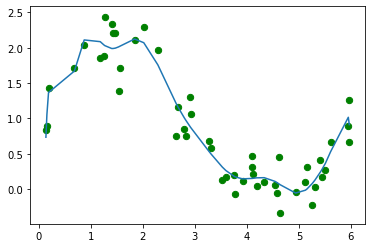

In [7]:
def train_draw_predict_polynomial(degree, data):
    X = generate_degrees(data['x_train'], degree)
    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)
    error = mean_squared_error(data['y_train'], y_pred)
    plt.scatter(start_df['x_train'], start_df['y_train'], 40, 'g')
    plt.plot(start_df['x_train'], y_pred)
    
train_draw_predict_polynomial(14,start_df)

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисяемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [8]:
class CustomLinearReg:
    def __init__(self):
        self.W = []
        self.y = np.array([])
    
    def fit(self, X, y):
        X_T_X = (X.T).dot(X)
        X_T_X_inverted = inv(X_T_X)
        self.W = X_T_X_inverted.dot(X.T).dot(y)
        
    def predict(self, X):
        self.y = X.dot(self.W.T)

In [10]:
from numpy.linalg import inv
X = [[1, i] for i in start_df['x_train']]
X = np.array(X)
y = np.array(start_df['y_train'])
CustomLinearReg1 = CustomLinearReg()
CustomLinearReg1.fit(X, y)

In [11]:
X.shape

(50, 2)

In [12]:
X.T.dot(X).shape

(2, 2)

In [15]:
inv((X.T).dot(X)).dot(X.T).dot(y).shape

(2,)

In [16]:
y.shape

(50,)

In [10]:
CustomLinearReg1.W

array([ 1.96903541, -0.33531472])

In [11]:
CustomLinearReg1.predict(X)
CustomLinearReg1.y

array([ 1.92263843,  1.91631157,  1.9057668 ,  1.73915947,  1.67589087,
        1.57255215,  1.54935366,  1.5430268 ,  1.49873878,  1.49030296,
        1.47554029,  1.45445075,  1.44812389,  1.35111203,  1.29206133,
        1.20137633,  1.08327494,  1.06851226,  1.0305511 ,  1.02211529,
        0.99258994,  0.98837203,  0.87237959,  0.85761691,  0.78591249,
        0.76271401,  0.70788121,  0.70366331,  0.65515738,  0.59188877,
        0.59188877,  0.58556191,  0.56447238,  0.51596645,  0.44637098,
        0.43582621,  0.41895459,  0.41262772,  0.31350691,  0.25023831,
        0.23969354,  0.20595028,  0.18907865,  0.15322644,  0.14268168,
        0.12159214,  0.08784889, -0.0260346 , -0.03236146, -0.03236146])

In [12]:
# Проверим

LinearRegression1 = LinearRegression().fit(X, start_df['y_train'])

In [13]:
# Коэффициенты приблизительно совпали

[LinearRegression1.intercept_, LinearRegression1.coef_[1]]

[1.9690354055876087, -0.3353147234726132]

In [14]:
# Прогнозные данные полностью совпали 

LinearRegression1.predict(X)

array([ 1.92263843,  1.91631157,  1.9057668 ,  1.73915947,  1.67589087,
        1.57255215,  1.54935366,  1.5430268 ,  1.49873878,  1.49030296,
        1.47554029,  1.45445075,  1.44812389,  1.35111203,  1.29206133,
        1.20137633,  1.08327494,  1.06851226,  1.0305511 ,  1.02211529,
        0.99258994,  0.98837203,  0.87237959,  0.85761691,  0.78591249,
        0.76271401,  0.70788121,  0.70366331,  0.65515738,  0.59188877,
        0.59188877,  0.58556191,  0.56447238,  0.51596645,  0.44637098,
        0.43582621,  0.41895459,  0.41262772,  0.31350691,  0.25023831,
        0.23969354,  0.20595028,  0.18907865,  0.15322644,  0.14268168,
        0.12159214,  0.08784889, -0.0260346 , -0.03236146, -0.03236146])

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid)
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [15]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
features = boston_dataset.data
y = boston_dataset.target

In [16]:
limit = features.shape[0] // 100 * 80

In [17]:
X_train = features[:limit]
y_train = y[:limit]
X_valid = features[limit:]
y_valid = y[limit:]

In [18]:
LinearRegression2 = LinearRegression()
LinearRegression2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = LinearRegression2.predict(X_valid);
r2 = mean_squared_error(y_valid, y_pred)
print(r2)

37.89377859960114


In [20]:
from sklearn.preprocessing import StandardScaler
normalized_X_train = StandardScaler().fit_transform(X_train)
normalized_y_train = StandardScaler().fit_transform(y_train.reshape(-1,1)).reshape(-1)
normalized_X_valid = StandardScaler().fit_transform(X_valid)
normalized_y_valid = StandardScaler().fit_transform(y_valid.reshape(-1,1)).reshape(-1)

In [21]:
LinearRegression2.fit(normalized_X_train, normalized_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = LinearRegression2.predict(normalized_X_valid);
r2 = mean_squared_error(normalized_y_valid, y_pred)
print(r2)

0.6908460466001579
